# Let's install the Following :

In [2]:
!pip install openai==0.28.1
!pip install tiktoken==0.6.0
!pip install langchain==0.1.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 

# Import

In [6]:
import os
import openai
import numpy as np
import pandas as pd
import json
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from openai.embeddings_utils import get_embedding
import warnings
import kagglehub

c:\Users\chrat\Desktop\BOOTCAMP\Course\Day3\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing OpenAI API KEY

In [2]:
with open('config/openai_key.json') as f:
    config = json.load(f)

API_KEY = config.get('API_KEY')

In [3]:
openai.api_key = API_KEY

# Import dataset

In [18]:
DOCS_PATH = 'docs'
DATASET_PATH = "IMDB Dataset.csv"

In [20]:
#df = pd.read_csv('https://raw.githubusercontent.com/AI-Republic-PH/AIR_AI_Engineering_Course_2024/refs/heads/main/Datasets/IMDB_Dataset.csv', nrows=20)
df = pd.read_csv(f'{DOCS_PATH}/{DATASET_PATH}', nrows=20)

In [21]:
df.sort_values(by='sentiment', ascending=False, inplace=True)

In [22]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [23]:
prompt = '''You are a sentiment analysis model trained to classify movie reviews from the IMDB dataset as either "positive" or "negative" based on the overall sentiment. Your response should strictly be one of these two words: positive or negative.

Positive should be assigned if the review expresses a favorable, happy, or optimistic sentiment.
Negative should be assigned if the review expresses an unfavorable, unhappy, or pessimistic sentiment.
Guidelines:

Ambiguity: In cases where sentiment is unclear or mixed, select the classification that best fits the dominant tone.
Neutral Sentiment: If a review appears neutral or lacks emotional content, classify it as "negative" unless there are clear positive indicators.
Length and Tone Variability: Reviews may vary widely in length and tone, so focus on the overall sentiment rather than specific words or phrases.
Only return the word positive or negative as your output, with no additional explanation or text.

The content is: '''

In [24]:
struct = [{'role':  'system', 'content' : prompt}]
user_message = df['review'][0]
print("User: " + user_message)
struct.append({"role": "user", "content": user_message})
print(struct[0])
print(struct[1])
chat = openai.ChatCompletion.create(model="gpt-4o-mini", messages = struct)
response = chat.choices[0].message.content
print("Assistant: " + response)

User: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to t

# Initialize a new column in df named 'Openai_Sentiment'

In [25]:
df['Openai_Sentiment'] = ''

In [26]:
df['Openai_Sentiment'] = ''

for x in range(len(df)):
    struct = [{'role': 'system', 'content': prompt}]
    user_message = df['review'][x]
    struct.append({"role": "user", "content": user_message})

    chat = openai.ChatCompletion.create(model="gpt-4o-mini", messages=struct)
    response = chat.choices[0].message.content

    df.loc[x, 'Openai_Sentiment'] = response


In [27]:
df.head(20)

,review,sentiment,Openai_Sentiment
0,One of the other reviewers has mentioned that ...,positive,positive
2,I thought this was a wonderful way to spend ti...,positive,positive
18,"I remember this film,it was the first film i h...",positive,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,positive
5,"Probably my all-time favorite movie, a story o...",positive,positive
6,I sure would like to see a resurrection of a u...,positive,positive
16,Some films just simply should not be remade. T...,positive,negative
9,If you like original gut wrenching laughter yo...,positive,positive
1,A wonderful little production. <br /><br />The...,positive,positive
14,This a fantastic movie of three prisoners who ...,positive,positive


# Checking the accuracy

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['sentiment'], df['Openai_Sentiment'])
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


# Checking CF

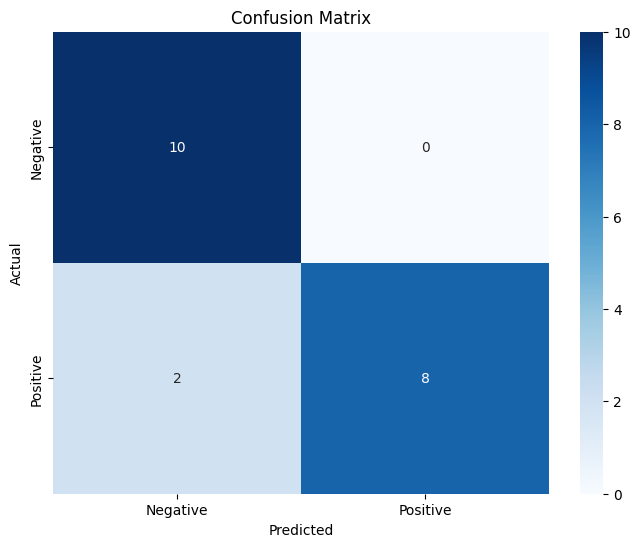

In [30]:
# prompt: write me code to generate a confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'accuracy' are defined from the previous code

# Create the confusion matrix
cm = confusion_matrix(df['sentiment'], df['Openai_Sentiment'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()